In [1]:
import pandas as pd
import numpy as np


In [42]:
from statsmodels.regression.linear_model import OLS

In [39]:
hw1_4 = pd.read_excel('HW1 part4.xlsx','Sheet1')

In [40]:
hw1_4_cmm = hw1_4[hw1_4['brand: CMMi (brand 1) / Knights & Schoening (brand 2)']==1]

In [44]:
lin_model=OLS(hw1_4_cmm.iloc[:,2],hw1_4_cmm.iloc[:,3:])

In [46]:
results = lin_model.fit()

In [50]:
from matplotlib import pyplot as plt
%pylab inline
results.params

Populating the interactive namespace from numpy and matplotlib


information provided with product      -0.066876
longevity of products                   0.030062
performance of products                 0.229967
features of products                   -0.100305
price of products                       0.304713
ease of use of products                 0.162691
reliability of products                 0.066556
documentation provided with products    0.088070
operating costs of products            -0.110113
delivery time of orders                 0.393429
response time of customer support      -0.022781
expertise of customer support          -0.006933
dtype: float64

In [51]:
results.pvalues

information provided with product       1.529952e-01
longevity of products                   5.899448e-01
performance of products                 3.656808e-06
features of products                    4.374881e-02
price of products                       3.547312e-07
ease of use of products                 1.286661e-03
reliability of products                 2.861134e-01
documentation provided with products    6.805819e-02
operating costs of products             2.325550e-02
delivery time of orders                 1.661835e-13
response time of customer support       5.930610e-01
expertise of customer support           8.829104e-01
dtype: float64

In [67]:
results_df = pd.concat([results.params,results.pvalues],axis=1)
results_df.columns = ['Coefficients','Significance']

results_df['Updated_Coefficients'] = results_df.apply(lambda x : 0 if x['Significance']<0.05 else x['Coefficients'],axis=1)
results_df

,Coefficients,Significance,Updated_Coefficients
information provided with product,-0.066876,1.529952e-01,-0.066876
longevity of products,0.030062,5.899448e-01,0.030062
performance of products,0.229967,3.656808e-06,0.000000
features of products,-0.100305,4.374881e-02,0.000000
price of products,0.304713,3.547312e-07,0.000000
ease of use of products,0.162691,1.286661e-03,0.000000
reliability of products,0.066556,2.861134e-01,0.066556
documentation provided with products,0.088070,6.805819e-02,0.088070
operating costs of products,-0.110113,2.325550e-02,0.000000
delivery time of orders,0.393429,1.661835e-13,0.000000


In [66]:
results_df

,Coefficients,Significance
information provided with product,-0.066876,1.529952e-01
longevity of products,0.030062,5.899448e-01
performance of products,0.229967,3.656808e-06
features of products,-0.100305,4.374881e-02
price of products,0.304713,3.547312e-07
ease of use of products,0.162691,1.286661e-03
reliability of products,0.066556,2.861134e-01
documentation provided with products,0.088070,6.805819e-02
operating costs of products,-0.110113,2.325550e-02
delivery time of orders,0.393429,1.661835e-13


In [85]:
cmm_performance = hw1_4_cmm.iloc[:,2:].mean()

In [88]:
results_df

,Coefficients,Significance,Updated_Coefficients
information provided with product,-0.066876,1.529952e-01,-0.066876
longevity of products,0.030062,5.899448e-01,0.030062
performance of products,0.229967,3.656808e-06,0.000000
features of products,-0.100305,4.374881e-02,0.000000
price of products,0.304713,3.547312e-07,0.000000
ease of use of products,0.162691,1.286661e-03,0.000000
reliability of products,0.066556,2.861134e-01,0.066556
documentation provided with products,0.088070,6.805819e-02,0.088070
operating costs of products,-0.110113,2.325550e-02,0.000000
delivery time of orders,0.393429,1.661835e-13,0.000000


In [101]:
results_merged = results_df.merge(cmm_performance.to_frame(),left_index=True,right_index=True)
results_merged=results_merged.rename(columns={0:'Performance'})
results_merged

,Coefficients,Significance,Updated_Coefficients,Performance
information provided with product,-0.066876,1.529952e-01,-0.066876,3.585
longevity of products,0.030062,5.899448e-01,0.030062,1.810
performance of products,0.229967,3.656808e-06,0.000000,2.390
features of products,-0.100305,4.374881e-02,0.000000,4.030
price of products,0.304713,3.547312e-07,0.000000,1.745
ease of use of products,0.162691,1.286661e-03,0.000000,2.185
reliability of products,0.066556,2.861134e-01,0.066556,1.725
documentation provided with products,0.088070,6.805819e-02,0.088070,3.990
operating costs of products,-0.110113,2.325550e-02,0.000000,3.980
delivery time of orders,0.393429,1.661835e-13,0.000000,3.525


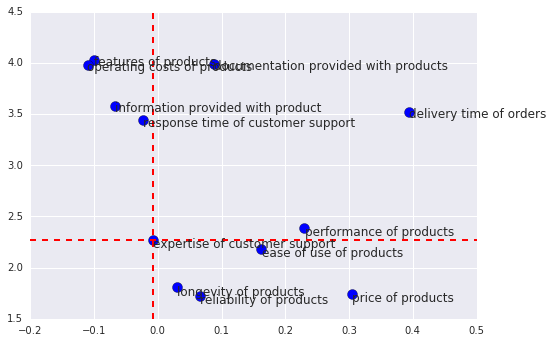

In [123]:
labels = results_merged.index.values
x = results_merged['Coefficients'].values
y = results_merged['Performance'].values
plt.scatter(results_merged['Coefficients'],results_merged['Performance'], s=100 ,marker='o')
for label,x,y in zip(labels,x,y):
    plt.annotate(label,xy=(x,y),textcoords='offset points', ha='left', va='top')
plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axhline(y.mean(), color='r', linestyle='dashed', linewidth=2)
plt.show()